In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# set display options
pd.set_option('display.max_columns', None)

In [198]:
zri = pd.read_csv('./data/df4.csv', index_col=0)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,8,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [199]:
zri.shape

(136447, 45)

In [200]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())
zri['education'] = zri['high_school_diploma'] + zri['associates_degree'] * 2 + zri['bachelors_degree'] * 3 +zri['masters_degree']* 4

In [201]:
# zri['withdegree'] = zri['bachelors_degree'] + zri['masters_degree']
# zri['withdegree'] = zri.withdegree.fillna(0)
# zri['hasdegree'] = np.where(zri['withdegree'] >0, 1, 0)
# zri['hasdegree'].value_counts()

In [202]:
zri['AGIncome'] = (zri['AGIncome']*1000)/zri['total_pop']
zri['TotIncome'] = (zri['TotIncome']*1000)/zri['total_pop']
zri['SalariesWages'] = (zri['SalariesWages']*1000)/zri['total_pop']
zri['NumUnemply'] =(zri['NumUnemply']*1000)/zri['total_pop']
zri['TotTaxes'] = (zri['TotTaxes']*1000)/zri['total_pop']

In [7]:
zipcodes = [12010, 13021, 90201, 91770, 91732, 90706, 91733, 12078]
for zipcode in zipcodes:
    zri.drop(zri[zri['ZIPCODE'] == zipcode].index, inplace = True)

In [203]:
#remove outliers
#zri = zri[(zri.value < 3433.18)]
# zri.income_per_capita = zri.income_per_capita.fillna(0)
# zri.TotTaxes = zri.TotTaxes.fillna(0)
# zri = zri[(zri.income_per_capita < 85180.28)]
# zri = zri[(zri.TotTaxes < 2531.24)]
zri.income_change = zri.income_change.fillna(0)


In [204]:
# #Log Transformation:
zri['LogValue'] = np.log(zri.value)
zri['LogTotTaxes'] = np.log(zri.TotTaxes)
zri['Logincome_per_capita'] = np.log(zri.income_per_capita)

# zri['LogTotIncome'] = np.log(zri.TotIncome)
# zri['LogSalariesWages'] = np.log(zri.SalariesWages)
# zri['Logmedian_age'] = np.log(zri.median_age)
# zri['LogAGIncome'] = np.log(zri.AGIncome)
# zri['Loggini_index'] = np.log(zri.gini_index)
# zri['Logpopulation_change'] = np.log(zri.population_change)


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [205]:
train = pd.merge(zri.loc[zri['Year']==2015].rename(columns = {'LogValue' : 'LogValue_2015'}),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','LogValue']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2016].rename(columns = {'LogValue' : 'LogValue_2016'}),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','LogValue']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [206]:
#drop columns to test

dropped = ['SizeRank', 'City', 'State', 'Metro', 'CountyName',\
        'Month','Year','Labor\nForce','Employed', 'Unemployed',\
        'Year-Month', 'FIPSCode', 'geo_id',\
        'value', 'year', 'TotTaxes', 'income_per_capita'] #'ZIPCODE'

train.drop(columns = dropped, inplace=True)
test.drop(columns = dropped, inplace=True)

# print(test.columns)
# train.columns

In [207]:
train.columns[test.isnull().any()]

Index(['LogValue'], dtype='object')

In [208]:
train = train.dropna(subset=['LogValue'])

In [209]:
X_train = train.drop(columns = ['LogValue'])
y_train = train['LogValue']

In [210]:
test.columns[test.isnull().any()]

Index(['LogValue'], dtype='object')

In [211]:
test = test.dropna(subset=['LogValue'])

In [212]:
X_test = test.drop(columns = ['LogValue'])
y_test = test['LogValue']

In [213]:
#show columns with missing values
print(X_train.columns[X_train.isnull().any()])
print(X_test.columns[X_test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


In [214]:
X_train.columns

Index(['ZIPCODE', 'total_pop', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index',
       'vacant_housing_units_for_rent', 'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'rental_units_supply', 'population_change', 'income_change',
       'supply_change', 'natural_amenity_rank', 'education', 'LogValue_2015',
       'LogTotTaxes', 'Logincome_per_capita'],
      dtype='object')

In [215]:
X_train.shape

(16232, 32)

In [216]:
#feature selection
model_cols = ['LogValue_2015', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank']

model_cols2 = ['LogValue_2016', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent',
    'natural_amenity_rank']

X_train = X_train[model_cols]

X_test = X_test[model_cols2]


In [167]:
# #feature selection
# model_cols = ['LogValue_2015', 'black_pop', 'asian_pop',
#        'vacant_housing_units_for_rent', 'natural_amenity_rank']

# model_cols2 = ['LogValue_2016', 'black_pop', 'asian_pop',
#        'vacant_housing_units_for_rent', 'natural_amenity_rank']

# X_train = X_train[model_cols]

# X_test = X_test[model_cols2]


## Model Generation

In [217]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import model_selection

In [218]:
lm = LinearRegression()

lm.fit(X_train, y_train)

print("Train Score: %.4f" % lm.score(X_train, y_train))
print("Test Score:  %.4f" % lm.score(X_test, y_test))

print(lm.score(X_train, y_train)- lm.score(X_test, y_test))



Train Score: 0.9625
Test Score:  0.9525
0.01005453804926637


In [170]:
lm.intercept_, lm.coef_

(0.5779678783662137,
 array([ 0.91479972,  0.00453724,  0.00796693,  0.00632675, -0.03942328,
        -0.19346547,  0.02218155]))

In [171]:
X_train.columns

Index(['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'white_pop',
       'vacant_housing_units_for_rent', 'natural_amenity_rank'],
      dtype='object')

In [172]:
# from sklearn.model_selection import cross_val_score
# print(np.sqrt(-1* cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

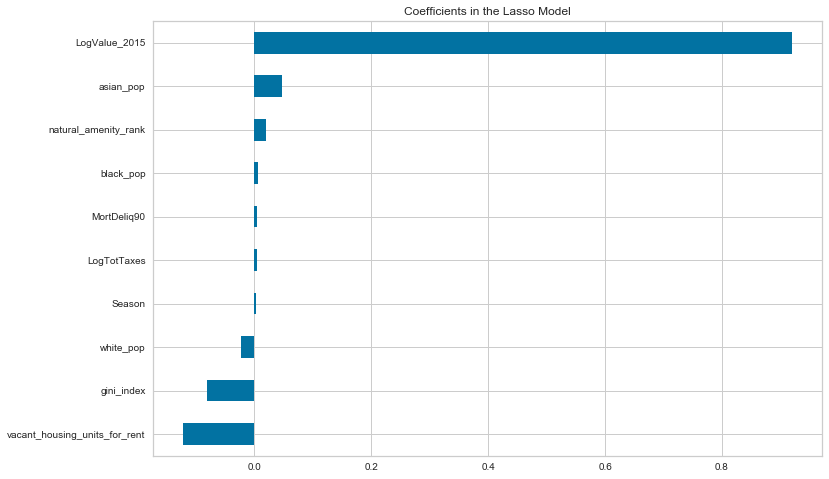

In [219]:
# param_grid={'alpha': np.logspace(-5, -3, 100)}
# grid_search = model_selection.GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Cross Validation")
# print("-" * 20)
# print("Best parameter: ", grid_search.best_params_)
# print("Best CV score:  %.4f" % grid_search.best_score_)

# alpha_cv = grid_search.best_estimator_.get_params()['alpha']

lasso = Lasso(alpha = 1e-05, normalize=True).fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh", figsize = (12, 8))
plt.title("Coefficients in the Lasso Model")

In [174]:
print(lasso.score(X_train, y_train))
lasso.score(X_test, y_test)

0.9620296278012107


0.9520623456203344

In [222]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,147.7,LogValue_2015
1,7.0,Season
2,54.8,LogTotTaxes
3,7.0,MortDeliq90
4,86.9,gini_index
5,3.3,black_pop
6,2.6,asian_pop
7,11.5,white_pop
8,4.6,vacant_housing_units_for_rent
9,12.5,natural_amenity_rank


In [31]:
#Q-Q plot for normality
#fig4=sm.qqplot(reg1.resid, line='r')

In [32]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-10,1,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)
    lasso.fit(X_train, y_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X_train, y_train))

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

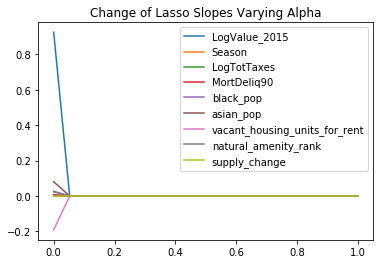

In [33]:
coefs = pd.DataFrame(np.array(coefs), columns=X_train.columns)
for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=0)
plt.title('Change of Lasso Slopes Varying Alpha')

In [34]:
X_train.head()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,supply_change
0,7.421776,2.0,6.350867,3.000000,0.026682,0.071471,0.053914,3.0,4.827290
2,7.036148,2.0,6.229107,2.396746,0.062797,0.155716,0.030479,3.0,7.735772
3,7.507690,2.0,6.965521,3.000000,0.043573,0.057157,0.028165,3.0,54.949438
4,6.858565,2.0,4.276235,2.100000,0.015401,0.009632,0.069657,5.0,0.886511
5,7.243513,2.0,5.445087,3.000000,0.192627,0.104966,0.067138,3.0,42.438567


In [35]:
y_train = pd.DataFrame(y_train)

In [36]:
y_train.head()

,LogValue
0,7.458763
2,7.101676
3,7.515345
4,6.800170
5,7.288244


In [37]:
X_train.columns = X_train.columns.to_series().apply(lambda x: x.strip())

In [38]:
X_train.reset_index(drop = True, inplace = True)

In [39]:
X_train.head()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,supply_change
0,7.421776,2.0,6.350867,3.000000,0.026682,0.071471,0.053914,3.0,4.827290
1,7.036148,2.0,6.229107,2.396746,0.062797,0.155716,0.030479,3.0,7.735772
2,7.507690,2.0,6.965521,3.000000,0.043573,0.057157,0.028165,3.0,54.949438
3,6.858565,2.0,4.276235,2.100000,0.015401,0.009632,0.069657,5.0,0.886511
4,7.243513,2.0,5.445087,3.000000,0.192627,0.104966,0.067138,3.0,42.438567


In [40]:
y_train.reset_index(drop = True, inplace = True)

In [42]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

Drop  with p-value 


['LogValue_2015',
 'Season',
 'MortDeliq90',
 'black_pop',
 'asian_pop',
 'vacant_housing_units_for_rent',
 'natural_amenity_rank',
 'supply_change']

In [43]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = X_train
y = y_train
names=pd.DataFrame(X_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,1
1,3
2,4
3,2
4,1
5,1
6,1
7,1
8,5


In [44]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

                         Feature  Rank
0                  LogValue_2015     1
4                      black_pop     1
5                      asian_pop     1
6  vacant_housing_units_for_rent     1
7           natural_amenity_rank     1


5

In [45]:
#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 8 variables: can be changed and checked in model for accuracy
rfe_mod =  RFECV(lin_reg, step=1, cv=300) #RFE(lin_reg, 4, step=1)

myvalues=rfe_mod.fit(X,y) #to fit

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
#UNIVARIATE SELECTION
# Feature Extraction with Univariate Statistical Tests (f_regression)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

# load data
X = X_train
y = y_train
names=pd.DataFrame(X_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(X, y)

print (results.scores_)
#print (results.pvalues_)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score']).head(13)

#We can now rank the importance of each feature based on their score.  
#The higher the score, the more important the variable. 

[3.60910833e+05 3.50298332e+00 6.04973282e+03 4.32662895e+01
 5.71941832e+02 3.55981447e+03 3.22187719e+03 1.80936130e+03
 1.47535083e+01]


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature,Score
1,Season,3.502983
8,supply_change,14.753508
3,MortDeliq90,43.266289
4,black_pop,571.941832
7,natural_amenity_rank,1809.361297
6,vacant_housing_units_for_rent,3221.877191
5,asian_pop,3559.814469
2,LogTotTaxes,6049.732817
0,LogValue_2015,360910.832910


In [47]:
#create a single data frame with both features and target by concatonating
train_df=pd.concat([X_train, y_train], axis=1)
train_df.head()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,supply_change,LogValue
0,7.421776,2.0,6.350867,3.000000,0.026682,0.071471,0.053914,3.0,4.827290,7.458763
1,7.036148,2.0,6.229107,2.396746,0.062797,0.155716,0.030479,3.0,7.735772,7.101676
2,7.507690,2.0,6.965521,3.000000,0.043573,0.057157,0.028165,3.0,54.949438,7.515345
3,6.858565,2.0,4.276235,2.100000,0.015401,0.009632,0.069657,5.0,0.886511,6.800170
4,7.243513,2.0,5.445087,3.000000,0.192627,0.104966,0.067138,3.0,42.438567,7.288244


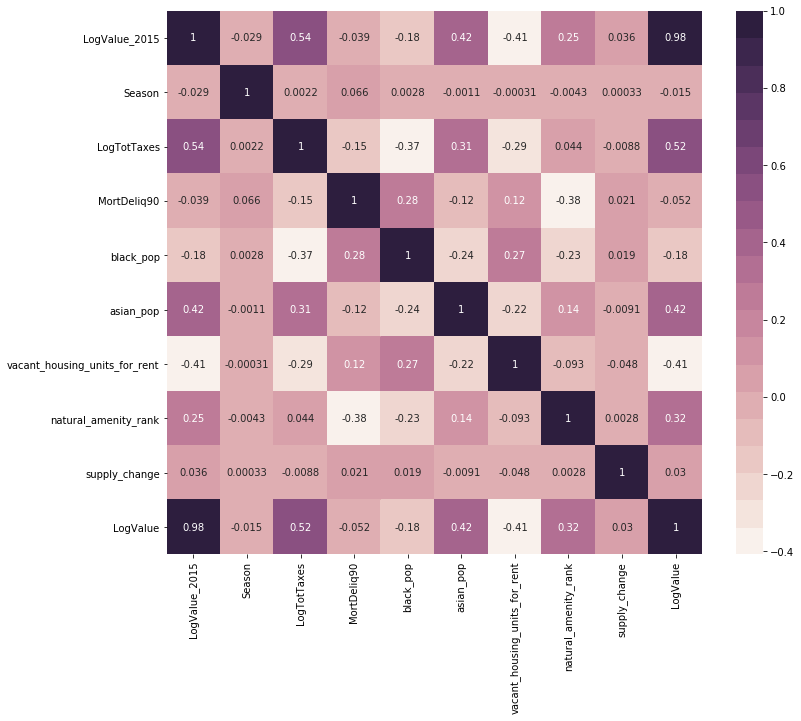

In [48]:
#Visualize corelations
import seaborn as sns
plt.figure(figsize=(12,10))
ax=sns.heatmap(train_df.corr(), annot=True, cmap=sns.cubehelix_palette(20,  light=0.95, dark=0.15))
ax.xaxis.tick_top
plt.show()

In [49]:
train_df.head()

,LogValue_2015,Season,LogTotTaxes,MortDeliq90,black_pop,asian_pop,vacant_housing_units_for_rent,natural_amenity_rank,supply_change,LogValue
0,7.421776,2.0,6.350867,3.000000,0.026682,0.071471,0.053914,3.0,4.827290,7.458763
1,7.036148,2.0,6.229107,2.396746,0.062797,0.155716,0.030479,3.0,7.735772,7.101676
2,7.507690,2.0,6.965521,3.000000,0.043573,0.057157,0.028165,3.0,54.949438,7.515345
3,6.858565,2.0,4.276235,2.100000,0.015401,0.009632,0.069657,5.0,0.886511,6.800170
4,7.243513,2.0,5.445087,3.000000,0.192627,0.104966,0.067138,3.0,42.438567,7.288244


In [50]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['LogValue_2015'], dtype='object')

In [51]:
n_features = sfm.transform(X).shape[1]
n_features

1

In [176]:
lm.fit(X_train, y_train)

print('Linear Model')
print('-'*20)
print("Train Score:   %.5f" % lm.score(X_train, y_train))
print("Test Score:    %.5f\n" % lm.score(X_test, y_test))

Linear Model
--------------------
Train Score:   0.96212
Test Score:    0.95211



In [177]:
lasso = Lasso(alpha = 1e-05, normalize=True).fit(X_train, y_train)

print('Penalized Linear Model')
print('-'*20)
print("Train Score: %.5f" % lasso.score(X_train, y_train))
print("Test Score:  %.5f" % lasso.score(X_test, y_test))

Penalized Linear Model
--------------------
Train Score: 0.96203
Test Score:  0.95206


In [178]:
train_set = pd.concat([X_train, y_train], axis=1)
y = train_set['LogValue']
x = train_set.drop('LogValue', axis=1)

from sklearn.metrics import mean_squared_error

def expo(list_):
    return list(map(exp, list_))

print('Final Model')
print('-'*20)
lm.fit(x, y)
print("R^2 Score:  %.2f" % (100*lm.score(x, y)))
print("Mean Error: $%.0f\n" % mean_squared_error(expo(y), expo(lm.predict(x)), squared=False))



Final Model
--------------------
R^2 Score:  96.21
Mean Error: $111



In [182]:
residuals = pd.DataFrame(y_test - y_pred)

In [183]:
len(residuals.loc[abs(residuals['LogValue']) > 0.4])

39

In [184]:
residuals.loc[abs(residuals['LogValue']) > 0.4].index

Int64Index([  974,  1995,  2426,  3446,  3880,  4905,  5332,  6344,  6772,
             7365,  7791,  8215,  8805,  8819,  9197,  9394,  9657,  9821,
            10249, 10263, 10638, 10675, 10838, 11261, 11689, 11703, 12073,
            12108, 12267, 12684, 12692, 13119, 13133, 13503, 13694, 13961,
            14960, 15157, 16026],
           dtype='int64')

In [ ]:
largeres = test.loc[[974,  1995,  2426,  3446,  3880,  4905,  5332,  6344,  6772,
             7365,  7791,  8215,  8805,  8819,  9197,  9394,  9657,  9821,
            10249, 10263, 10638, 10675, 10838, 11261, 11689, 11703, 12073,
            12108, 12267, 12684, 12692, 13119, 13133, 13503, 13961, 14960,
            15157, 16026], :]


In [ ]:
largeres.ZIPCODE.value_counts()

In [ ]:
zipcodes = [12010, 13021, 90201, 91770, 91732, 90706, 91733, 12078]

In [ ]:
dropzips= zri[zri.ZIPCODE.isin(zipcodes)==True]

In [ ]:
dz = dropzips.groupby(['Year', 'ZIPCODE']).agg({'value':'mean'}).reset_index()

In [ ]:
dz

In [ ]:
dz = dz.pivot(index='Year', columns='ZIPCODE', values='value')

In [ ]:
dz.head()

In [ ]:
dz.plot(figsize = (15,7)).legend(title='zipcode', bbox_to_anchor=(1, 1))
plt.title('Yearly ZRI for zipcodes with largest residuals')
plt.ylabel('ZRI')
plt.rcParams.update({'font.size': 10})
plt.savefig('YearlyZRIzipcodes.png')


In [ ]:
dropzips.groupby('Year').agg({'value':'mean'}).plot()

In [ ]:
zipZRI = zri[zri.ZIPCODE == 12010]
zipZRI.groupby('Year').agg({'value':'mean'}).plot()

In [88]:
train_set = pd.concat([X_train, y_train], axis=1)
y = train_set['LogValue']
x = train_set.drop('LogValue', axis=1)

from sklearn.metrics import mean_squared_error

def expo(list_):
    return list(map(exp, list_))

print('Final Model')
print('-'*20)
lm.fit(x, y)
print("R^2 Score:  %.2f" % (100*lm.score(x, y)))
print("Mean Error: $%.0f\n" % mean_squared_error(expo(y), expo(lm.predict(x)), squared=False))

Final Model
--------------------
R^2 Score:  96.43
Mean Error: $108



Text(0, 0.5, 'Residual Log Rent')

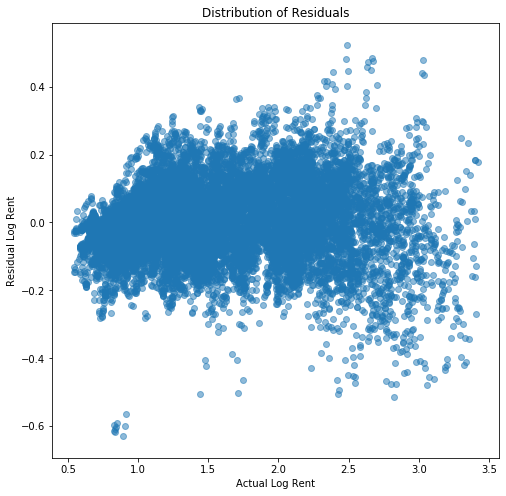

In [89]:
res_x = [target/1000 for target in expo(y)]
res_y = [(target - predict)/1000 for (target, predict) in zip(expo(y), expo(lm.predict(x)))]
plt.figure(figsize=(8,8))
plt.scatter(res_x, res_y, alpha = 0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Actual Log Rent')
plt.ylabel('Residual Log Rent')

In [181]:
# Instantiate, fit, predict
from sklearn.metrics import r2_score 


lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lm.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.91479972  0.00453724  0.00796693  0.00632675 -0.03942328 -0.19346547
  0.02218155]
Mean squared error: 0.01
R_squared score: 0.95


In [ ]:
train_set.head()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and asian_pop")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'LogValue ~ asian_pop', data=train_set).fit()
# print the result
print (reg1.summary())

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and income_per_capita")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'LogValue ~ LogValue_2015', data=train_set).fit()
# print the result
print (reg1.summary())

In [ ]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

In [ ]:
# simple plot of residuals
import seaborn as sns

sns.residplot('LogValue', 'LogTotTaxes', data=train_set)

In [ ]:
train_set.columns

In [ ]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train_set.shape, "\n")
print ("Column Headers:", list(train_set.columns.values), "\n")
print (train_set.dtypes)

In [ ]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train_set:
    # Find all the unique feature values
    uniq = train_set[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train_set[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

In [ ]:
# Check for duplicate index or rows
idsUnique = len(set(train_set.index))
idsTotal = train_set.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

In [ ]:
#get summary of numerical variables
train_set.describe()

In [ ]:
# Skewness of the distribution

print(train_set.skew())

# Values close to 0 show less skew


In [ ]:
# Skewness of the distribution

print(train_set.kurt())

In [ ]:
#Check when a value in a cloumn is zero
train_set[(train_set['LogValue'] == 0)].count()

In [ ]:
df = train_set[['LogTotTaxes','LogValue']]


In [ ]:
df.head()


In [ ]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['LogTotTaxes'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

In [ ]:
train_set.boxplot(column="LogValue")
#sns.boxplot(x='value', y='Year', data=train_set)

In [ ]:
train_set.plot(kind="scatter",     # Create a scatterplot
              x='vacant_housing_units_for_rent',          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5))

In [ ]:
train_set.columns

In [ ]:
p = sns.pairplot(train_set, x_vars=['LogValue_2015', 'Season', 'LogTotTaxes', 'MortDeliq90', 'black_pop',
       'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank'], y_vars='LogValue', height=7, aspect=0.7)

In [ ]:
#load_ext rpy2.ipython

In [ ]:
%%R -i X -i y
a
lin_reg <- lm(LogValue ~ ., data = train_set)
summary(lin_reg)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
gbm = GradientBoostingRegressor()

gbm.set_params(n_estimators = 1000, 
            learning_rate = .3, #.3,
            max_depth = 3, #2,
            min_samples_leaf = 3)

gbm.fit(X_train,y_train)

print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

In [ ]:
#Random Forrest
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

randomForest.set_params(random_state=42, max_depth = 8, min_samples_split = 2, n_estimators=100, max_features =4)

print(randomForest.fit(X_train,y_train))


print(randomForest.score(X_train,y_train))
randomForest.score(X_test,y_test)


In [ ]:
feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


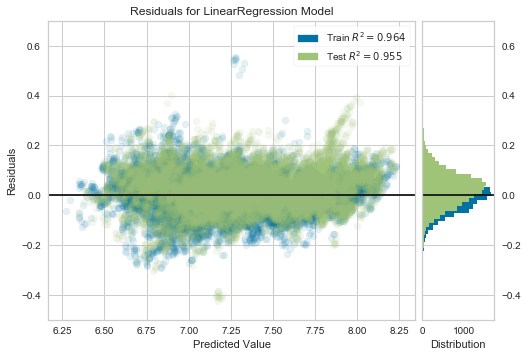

<Figure size 576x396 with 0 Axes>

In [90]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(lm, train_alpha = 0.1, test_alpha =0.1)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)# Evaluate ttrain_alpha = 0.1, test_alpha =0.01he model on the test data
plt.ylim([-0.5, 0.7])
visualizer.show()                 # Finalize and render the figure
plt.savefig('Residuals1.png')